<a href="https://colab.research.google.com/github/fahadrafiq94/Data-Semantics-/blob/main/Text_Summerizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summerization LLM

In [1]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup

In [2]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # This downloads the stopwords dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 1. Loading the Dataset

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset

In [5]:
dataset = load_dataset("wikihow", "all", data_dir="/content/drive/MyDrive/wikihow_data/")

Generating train split:   0%|          | 0/157252 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5599 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5577 [00:00<?, ? examples/s]

## 2. Becoming one with the Dataset

In [6]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'headline', 'title'],
        num_rows: 157252
    })
    validation: Dataset({
        features: ['text', 'headline', 'title'],
        num_rows: 5599
    })
    test: Dataset({
        features: ['text', 'headline', 'title'],
        num_rows: 5577
    })
})


In [7]:
# Viewing the first few entries in the training set
for i in range(5):
    print(dataset['train'][i])

{'text': "If you're a photographer, keep all the necessary lens, cords, and batteries in the same quadrant of your home or studio. Paints should be kept with brushes, cleaner, and canvas, print supplies should be by the ink, etc. Make broader groups and areas for your supplies to make finding them easier, limiting your search to a much smaller area. Some ideas include:\n\n\nEssential supplies area -- the things you use every day.\nInspiration and reference area.\nDedicated work area .\nInfrequent or secondary supplies area, tucked out of the way.;\n, This doesn't mean cleaning the entire studio, it just means keeping the area immediately around the desk, easel, pottery wheel, etc. clean each night. Discard trash or unnecessary materials and wipe down dirty surfaces. Endeavor to leave the workspace in a way that you can sit down the next day and start working immediately, without having to do any work or tidying.\n\n\nEven if the rest of your studio is a bit disorganized, an organized w

### 2.1 Converting data into dataframes

In [8]:
train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

In [9]:
train_df.head()

,text,headline,title
0,"If you're a photographer, keep all the necessa...",Keep related supplies in the same area.\nMake ...,How to Be an Organized Artist1
1,See the image for how this drawing develops st...,Create a sketch in the NeoPopRealist manner of...,How to Create a Neopoprealist Art Work
2,It is possible to become a VFX artist without ...,Get a bachelor’s degree.\nEnroll in a studio-b...,How to Be a Visual Effects Artist1
3,The best art investors do their research on th...,Start with some experience or interest in art....,How to Become an Art Investor
4,"As you start planning for a project or work, y...","Keep your reference materials, sketches, artic...",How to Be an Organized Artist2


In [10]:
train_df.describe()

,text,headline,title
count,157252,157252,157252
unique,157171,156988,157252
top,";\n,\n\n\nSouth of Falador\nNorth of Catherby\...",Make the first stroke.\nMake the second stroke...,How to Be an Organized Artist1
freq,15,10,1


In [11]:
train_df = train_df.astype(str)
rows, columns = train_df.shape

In [12]:
rows, columns

(157252, 3)

### 2.2. Text Analysis

In [13]:
# Calculating the length of articles and summaries in the training set
print("Average article length:", train_df['text'].apply(len).mean())
print("Average summary length:", train_df['headline'].apply(len).mean())


Average article length: 2901.2265853534454
Average summary length: 305.95577798692545


In [14]:
train_df.head()

,text,headline,title
0,"If you're a photographer, keep all the necessa...",Keep related supplies in the same area.\nMake ...,How to Be an Organized Artist1
1,See the image for how this drawing develops st...,Create a sketch in the NeoPopRealist manner of...,How to Create a Neopoprealist Art Work
2,It is possible to become a VFX artist without ...,Get a bachelor’s degree.\nEnroll in a studio-b...,How to Be a Visual Effects Artist1
3,The best art investors do their research on th...,Start with some experience or interest in art....,How to Become an Art Investor
4,"As you start planning for a project or work, y...","Keep your reference materials, sketches, artic...",How to Be an Organized Artist2


In [15]:
# Check for missing values
print(train_df.isnull().sum())

text        0
headline    0
title       0
dtype: int64


## 3. Preprocessing and Data Cleaning

In [16]:
cleaned_train_df=train_df[train_df['text'].isnull()==False]
cleaned_train_df=train_df[train_df['headline'].isnull()==False]
cleaned_train_df=cleaned_train_df[cleaned_train_df['text']!='nan']
#dropping duplicates
cleaned_train_df.drop_duplicates(subset=['text'],inplace=True)


In [17]:
cleaned_train_df.head()

,text,headline,title
0,"If you're a photographer, keep all the necessa...",Keep related supplies in the same area.\nMake ...,How to Be an Organized Artist1
1,See the image for how this drawing develops st...,Create a sketch in the NeoPopRealist manner of...,How to Create a Neopoprealist Art Work
2,It is possible to become a VFX artist without ...,Get a bachelor’s degree.\nEnroll in a studio-b...,How to Be a Visual Effects Artist1
3,The best art investors do their research on th...,Start with some experience or interest in art....,How to Become an Art Investor
4,"As you start planning for a project or work, y...","Keep your reference materials, sketches, artic...",How to Be an Organized Artist2


In [18]:
stop_words = set(stopwords.words('english'))

def text_cleaner(text,num):
  str = text.lower()
  str = BeautifulSoup(str, "lxml").text
  str = re.sub(r'\([^)]*\)', '', str)
  str = re.sub('"','', str)
  str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])
  str = re.sub(r"'s\b","",str)
  str = re.sub("[^a-zA-Z]", " ", str)
  str = re.sub('[m]{2,}', 'mm', str)
  if(num==0):
    str = re.sub(r'\.',' . ',str)
  if(num==0):
      tokens = [w for w in str.split() if not w in stop_words]

  else:
      tokens=str.split()
  long_words=[]
  for i in tokens:
      if len(i)>1:                                                 #removing short words
          long_words.append(i)
  return (" ".join(long_words)).strip()

In [19]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [20]:
#call the function
clean_text = []
for t in cleaned_train_df['text']:
    clean_text.append(text_cleaner(t,0))

In [21]:
#call the function
clean_summary = []
for t in cleaned_train_df['headline']:
    clean_summary.append(text_cleaner(t,0))

In [22]:
cleaned_train_df['text']=clean_text
cleaned_train_df['headline']=clean_summary

cleaned_train_df.replace('', np.nan, inplace=True)
cleaned_train_df.dropna(axis=0,inplace=True)

In [23]:
cleaned_train_df

,text,headline,title
0,photographer keep necessary lens cords batteri...,keep related supplies area make effort clean d...,How to Be an Organized Artist1
1,see image drawing develops step step however i...,create sketch neopoprealist manner future mura...,How to Create a Neopoprealist Art Work
2,possible become vfx artist without college deg...,get bachelor degree enroll studio based progra...,How to Be a Visual Effects Artist1
3,best art investors research pieces art buy som...,start experience interest art understand diffe...,How to Become an Art Investor
4,start planning project work likely gathering s...,keep reference materials sketches articles pho...,How to Be an Organized Artist2
...,...,...,...
157247,name like might fiddle spelling see alternate ...,consider changing spelling name avoid symbols ...,How to Pick a Stage Name3
157248,name might sound great say loud bedroom find s...,try name legally change name register stage na...,How to Pick a Stage Name4
157249,relief printing oldest traditional printing te...,understand process relief printing examine rim...,How to Identify Prints1
157250,intaglio italian incis ing correspondingly rev...,understand process intaglio printing look plat...,How to Identify Prints2


## 4. Visualiztion Sequence Distribution

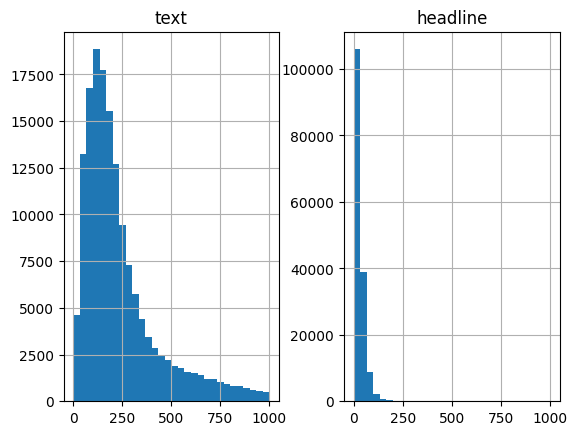

In [24]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in cleaned_train_df['text']:
      temp=i.split()
      text_word_count.append(len(temp))

for j in cleaned_train_df['headline']:
  #print(j)
  temp1=j.split()
  headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'text':text_word_count, 'headline':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

The distribution in first graph has a right-skewed shape. There are a number of longer texts, but the frequency of these longer texts decreases as the length increases.<br>
The headline data is much less spread out than the text data. The distribution drops off very quickly, means headlines are generally concise and there are very few lengthy headlines.


In [25]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 40

max_len_text= 150
max_len_headline=50

In [26]:
cnt=0
for i in cleaned_train_df['text']:
    if(len(i.split())<=150):
        cnt=cnt+1
print(cnt/len(cleaned_train_df['text']))

0.3998905594828299


## 5. Selecting text and headlines below the maximum lengths

In [27]:
text1 =np.array(cleaned_train_df['text'])
headline1=np.array(cleaned_train_df['headline'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    if(len(headline1[i].split())<=50 and len(text1[i].split())<=150):
        short_text.append(text1[i])
        short_summary.append(headline1[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [28]:
# Validating the lengths

text1 =np.array(df['text'])
headline1=np.array(df['summary'])


for i in range(len(text1)):
    if(len(headline1[i].split())>=150):
      print(i)

In [29]:
print(df['text'][50],df['summary'][50],sep='\n')

talk something likes tv shows movies sports hobbies etc make sure calm casual yet still appear interested give number call later frantic crazy say remain serene time talk person tomorrow let get says guys comfortable however says wait try asking otherwise catch say thanks smile get excited later
start conversation crush five minutes class end minute bell rings look clock say oh man class almost refuses casually shake say oh okay says yes gives go crazy right


## 6. Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True)

In [31]:
print(len(x_train))
print(len(x_test))

41262
17684


## 7. Language Translation

In [32]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [34]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")

    # Split every line into pairs and normalize
    text=np.array(text)
    summary=np.array(summary)
    pairs = [[text[i],summary[i]] for i in range(len(text))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs

In [35]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name,"--------------------", input_lang.n_words)
    #print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [36]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)
#print(random.choice(pairs))


Reading lines...
Read 41262 sentence pairs
Counting words...
Counted words:
['copyright shortcut example alt ctrl use special characters tab find frequently used symbols like copyright registered trademark ellipsis single opening quote etc along shortcuts'
 'patches work dull pain relax away reducing inflammation heat patches sold counter convenient stores worn needed specific usage directions package followed also try using electric heating pad never sleep heating pad dangerous epsom salt proven help aid numerous body ailments works dissolving warm water absorbing skin reduce inflammation help muscle nerve function replenish magnesium body magnesium helps release serotonin brain chemical promotes feelings calmness relaxation add one cup epsom salt warm bath water let dissolve completely get water sit tub fifteen minutes rinse clean water done great way warm muscles increase blood circulation also helps spread oxygen nutrients throughout muscles spend minutes warming body stretch muscl

## 8. Modeling: GRU with Attention Mechanism

### 8.1. Sequence to Sequence Converting

In [37]:
SOS_token = 0
EOS_token = 1

In [38]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [39]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 8.2 RNN Encoder (Convert Input into Fixed sized Context)

In [40]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### 8.2 RNN Decoder

In [41]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [42]:
MAX_LENGTH = 150

### 8.3. Decoder with Attention

In [43]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### 8.3. Word Mapping into vocabulary

In [44]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

### 8.4 Training Time keeping Function

In [45]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

### 8.5. Ploting Funtion

In [46]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

### 8.6. Training and Evaluation

In [47]:
teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [48]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [49]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]


In [51]:
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 50000, print_every=1000)

Training....
1000 / 50001
3m 5s (- 151m 8s) (1000 2%) 5.8871
2000 / 50001
6m 10s (- 148m 8s) (2000 4%) 5.7487
3000 / 50001
9m 26s (- 147m 54s) (3000 6%) 5.7403
4000 / 50001
12m 28s (- 143m 28s) (4000 8%) 5.7906
5000 / 50001
15m 21s (- 138m 12s) (5000 10%) 5.7147
6000 / 50001
18m 16s (- 133m 57s) (6000 12%) 5.7797
7000 / 50001
21m 10s (- 130m 2s) (7000 14%) 5.7238
8000 / 50001
24m 0s (- 126m 3s) (8000 16%) 5.7266
9000 / 50001
26m 51s (- 122m 22s) (9000 18%) 5.5262
10000 / 50001
29m 45s (- 119m 1s) (10000 20%) 5.6269
11000 / 50001
32m 37s (- 115m 39s) (11000 22%) 5.6304
12000 / 50001
35m 27s (- 112m 17s) (12000 24%) 5.4997
13000 / 50001
38m 19s (- 109m 3s) (13000 26%) 5.6063
14000 / 50001
41m 8s (- 105m 47s) (14000 28%) 5.4147
15000 / 50001
43m 58s (- 102m 36s) (15000 30%) 5.6234
16000 / 50001
47m 0s (- 99m 52s) (16000 32%) 5.6562
17000 / 50001
50m 0s (- 97m 4s) (17000 34%) 5.6706
18000 / 50001
52m 57s (- 94m 9s) (18000 36%) 5.4389
19000 / 50001
55m 51s (- 91m 8s) (19000 38%) 5.5253
2000

## 9. Predictions

In [52]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()
    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")

          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          #print('<', output_sentence)
          #print('')
    return(text,headline,pred_headline)

In [55]:
text,headline,pred_headline=evaluateRandomly(encoder1, attn_decoder1,15000)

pred_df_GRU=pd.DataFrame()

pred_df_GRU['text']=text
pred_df_GRU['headline']=headline
pred_df_GRU['pred_headline']=pred_headline

0.0 % complete
6.666666666666667 % complete
13.333333333333334 % complete
20.0 % complete
26.666666666666668 % complete
33.333333333333336 % complete
40.0 % complete
46.666666666666664 % complete
53.333333333333336 % complete
60.0 % complete
66.66666666666667 % complete
73.33333333333333 % complete
80.0 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [56]:
import os
pred_df_GRU.to_csv('Attention_GRU_Pred.csv',sep='\t',index=False,header=True)

### 9.1. Evaluation Metric "ROUGE"

In [59]:
def calculate_rogue(src_trg, pred_trg):

  #cut off <eos> token
  pred_trg = pred_trg[:-6]


  if (len(pred_trg) == 0):
    rogue_score = 0.0
  else:
    s = rouge.get_scores(pred_trg, src_trg, avg= True)
    rogue_score = s['rouge-1']['f']

  return rogue_score

### 9.2. Calucalting the attentions and plotting

In [57]:
#sentence, translation, attention
def plot_attention(sentence, predicted_sentence, attention, i):
  plt.rcParams.update({'font.size': 18})

  fig = plt.figure(figsize=(30,30))

  ax = fig.add_subplot(1,1,1)
  #print(len(attention))
  ax.matshow(attention, cmap='bone')
  #fig.colorbar(cax)
  #fontdict = {'fontsize': 25}

  #ax.set_xticklabels([''] + sentence.split(' ') +['<EOS>'], rotation=90)
  #ax.set_yticklabels([''] + predicted_sentence)

  ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], rotation=90)
  ax.set_yticklabels(['']+predicted_sentence)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
  #xlim(right=3)

  plt.show()
  #plt.close()

In [60]:
attn_plot_threshold = 0.45

def evaluateRandomlyprint_1(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()

    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          #if(i%1000==0):
           # print(i*100/n,"% complete")

          tokenized_input = nltk.word_tokenize(pair[0])
          #print(len(tokenized_input))
          output_words, attentions = evaluate(encoder, decoder, pair[0])

          output_sentence = ' '.join(output_words)

          #get rogue f-score -- need to pass tokenized version here
          #print(pair[0])
          #print(output_sentence)
          score = calculate_rogue(pair[0], output_sentence)
          #if(score>0.25):
           # print(score)

          if score > attn_plot_threshold:
            plot_attention(tokenized_input, output_words, attentions, i)

          #print('<', output_sentence)
          #print('')
    #return(text,headline,pred_headline)

In [61]:
!pip install rouge
import nltk
nltk.download('punkt')
from rouge import Rouge

rouge = Rouge()


evaluateRandomlyprint_1(encoder1, attn_decoder1,15000)
#plt.close()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
